In [53]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### Read data and display

In [54]:
df = pd.read_parquet('lastfm-dataset-1k.snappy.parquet')

KeyboardInterrupt: 

In [ ]:
df = df.dropna()

In [ ]:
print(f'Number of Records: {len(df):,}\nUnique Users: {df.user_id.nunique()}')
df

Number of Records: 16,936,134
Unique Users: 992


,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2006-08-13 13:59:20+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face
1,user_000001,2006-08-13 14:03:29+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero
2,user_000001,2006-08-13 14:10:43+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832,The Return Of Super Barrio - End Credits
3,user_000001,2006-08-13 14:17:40+00:00,67fb65b5-6589-47f0-9371-8a40eb268dfb,Tommy Guerrero,d9b1c1da-7e47-4f97-a135-77260f2f559d,Mission Flats
4,user_000001,2006-08-13 14:19:06+00:00,1cfbc7d1-299c-46e6-ba4c-1facb84ba435,Artful Dodger,120bb01c-03e4-465f-94a0-dce5e9fac711,What You Gonna Do?
...,...,...,...,...,...,...
19098848,user_001000,2009-05-04 00:29:53+00:00,fc7376fe-1a6f-4414-b4a7-83f50ed59c92,Flying Lotus,7cf60b11-fd28-4464-8882-038d9e818340,Melt!
19098849,user_001000,2009-05-04 00:31:39+00:00,fc7376fe-1a6f-4414-b4a7-83f50ed59c92,Flying Lotus,27f672f1-2dac-455b-8841-19e950d6f737,Comet Course
19098850,user_001000,2009-05-04 00:34:40+00:00,fc7376fe-1a6f-4414-b4a7-83f50ed59c92,Flying Lotus,1b2053e7-fb9e-4b7e-8ec8-548d4f42cafe,Orbit 405
19098851,user_001000,2009-05-04 09:00:33+00:00,acd902c5-91df-4e1f-8dd6-7c4a348a4cb9,Anathallo,9722b7e6-aad2-4175-a449-e32b595917bc,At The Lowest Point


In [ ]:
Number_of_users = 100
History_size = 500

userIds = []
trackIds = []

for userId in df.user_id.unique()[:Number_of_users]:


    userHistory = df[ (df["user_id"] == userId) ][:History_size]
    range_i = userHistory.index.values.tolist()

    for i in range_i:

        userIds.append(userHistory.user_id[i])
        trackIds.append(userHistory.track_id[i])


df_light = pd.DataFrame(columns = ["user_id",    "track_id"])

rows = pd.DataFrame({ "user_id":userIds,   "track_id":trackIds })
df_light = pd.concat([df_light,rows],axis=0)

User user_000001
User user_000002
User user_000003
User user_000004
User user_000005
User user_000006
User user_000007
User user_000008
User user_000009
User user_000010
User user_000011
User user_000012
User user_000013
User user_000014
User user_000015
User user_000016
User user_000017
User user_000018
User user_000019
User user_000020
User user_000021
User user_000022
User user_000023
User user_000024
User user_000025
User user_000026
User user_000027
User user_000028
User user_000029
User user_000030
User user_000031
User user_000032
User user_000033
User user_000034
User user_000035
User user_000036
User user_000037
User user_000038
User user_000039
User user_000040
User user_000041
User user_000042
User user_000043
User user_000044
User user_000045
User user_000046
User user_000047
User user_000048
User user_000049
User user_000050
User user_000051
User user_000052
User user_000053
User user_000054
User user_000055
User user_000056
User user_000057
User user_000058
User user_0000

In [ ]:
print(f'Number of Records: {len(df_light):,}\nUnique Users: {df_light.user_id.nunique()}')
df_light.head(20)

Number of Records: 48,614
Unique Users: 100


,user_id,track_id
0,user_000001,c4633ab1-e715-477f-8685-afa5f2058e42
1,user_000001,bc2765af-208c-44c5-b3b0-cf597a646660
2,user_000001,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832
3,user_000001,d9b1c1da-7e47-4f97-a135-77260f2f559d
4,user_000001,120bb01c-03e4-465f-94a0-dce5e9fac711
5,user_000001,777ac51f-8ffc-4c44-92b6-a2c75cbc6915
6,user_000001,328913b8-f31f-4abf-976e-7641174f680b
7,user_000001,8e81302a-6cde-4818-8703-43b5356ce0a0
8,user_000001,1c0377bb-c00b-4bbe-b4b2-615f13324adc
9,user_000001,8f916d23-0510-4ad5-9a7f-8a076c3f14ca


In [ ]:
new_df = pd.DataFrame(columns = ["user_id",	"track_id",	"count",])

userIdCounter=0

userIds = []
trackIds = []
trackCounts = []

for userId in df_light.user_id.unique():
    trackIdCounter=0

    for trackId in df_light[df_light["user_id"] == userId].track_id.unique():
        count = df_light[ (df_light['track_id'] == trackId) & (df_light["user_id"] == userId) ].count()
        
        userIds.append(userIdCounter)
        trackIds.append(trackIdCounter)
        trackCounts.append(count.track_id)

        trackIdCounter+=1

    if userIdCounter%10==0 : print(userIdCounter,"%")
    userIdCounter+=1

row = pd.DataFrame({ "user_id":userIds,	"track_id":trackIds, "count":trackCounts})
new_df = pd.concat([new_df,row],axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
new_df

,user_id,track_id,count
0,0,0,2
1,0,1,2
2,0,2,3
3,0,3,1
4,0,4,2
...,...,...,...
30449,99,336,1
30450,99,337,1
30451,99,338,1
30452,99,339,1


### Download Data
#### Standardize id: new id starts from 0 and increments by 1, output format: (user, item, rating)

In [55]:
N = len(new_df.user_id.unique())
M = len(new_df.track_id.unique())

print('number of users: %d \nnumber of unique tracks: %d \ntotal number of tracks: %d' %(N,M,new_df['count'].sum()))

number of users: 100 
number of unique tracks: 481 
total number of tracks: 48614


### Split Dataset

In [56]:
train_list, test_list = train_test_split(new_df,test_size=0.2)
print ('train length: %d \ntest length: %d' %(len(train_list),len(test_list)))

train length: 24363 
test length: 6091


### Convert data to matrix format

In [57]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

train_mat

array([[0., 2., 0., ..., 0., 0., 0.],
       [7., 2., 2., ..., 0., 0., 0.],
       [0., 5., 2., ..., 0., 0., 0.],
       ...,
       [0., 1., 2., ..., 0., 0., 0.],
       [4., 0., 4., ..., 0., 0., 0.],
       [2., 3., 3., ..., 0., 0., 0.]])

### Calculate similarity

In [58]:
# Calculate the similarity between a and b
def calculate_similarity(a, b, model='pearson', minimum_common_items=5):
    assert a.shape==b.shape
    dim = len(a.shape) # Vector dimension
    common_items = a*b>0 # Commonly rated items
    common_size = np.sum(common_items,axis=dim-1)
    
    if model=='pearson':
        mean_a = np.sum(a,axis=dim-1)/np.sum(a>0,axis=dim-1)
        mean_b = np.sum(b,axis=dim-1)/np.sum(b>0,axis=dim-1)
        if dim ==1: # If two column vectors
            aa = (a - mean_a)*common_items
            bb = (b - mean_b)*common_items
        else:
            aa = (a - np.reshape(mean_a, (-1,1)))*common_items
            bb = (b - np.reshape(mean_b, (-1,1)))*common_items
    else: # Consine
        mean_u = np.sum(b,axis=0)/np.sum(b>0,axis=0)
        aa = (a - mean_u)*common_items
        bb = (b - mean_u)*common_items
        
    sim = np.sum(aa*bb, axis=dim-1)/(np.sqrt(np.sum(aa**2, axis=dim-1))*np.sqrt(np.sum(bb**2, axis=dim-1)) + 1e-10)
    least_common_items = common_size>minimum_common_items # Products with a common rating of at least least_common_items
    return sim*least_common_items


# Calculate similarity
def similarity_matrix(mat, model='pearson', minimum_common_items=5):
    n,m = mat.shape
    sim_list=[]
    for u in range(n):
        a = np.tile(mat[u,:], (n,1))
        b = mat
        if model=='pearson':
            sim = calculate_similarity(a, b, model='pearson', minimum_common_items=minimum_common_items)
        else: # consine
            sim = calculate_similarity(a, b, model='consine', minimum_common_items=minimum_common_items)
        sim_list.append(sim)
        if u % 100 ==0:
            print(u)
    return np.array(sim_list) 

In [59]:
sim_mat = similarity_matrix(mat=train_mat, model='pearson')
neighbors = np.argsort(-np.array(sim_mat)) # Get neighbors
sim_sort = -1*np.sort(-np.array(sim_mat)) # Get the similarity of the corresponding neighbors

0


In [60]:
np.set_printoptions(precision=4, suppress=True)
print('user 0:')
print('neighbors:') # Neighbors of user 0
print(neighbors[0,:20])
print('sim:\n') # Neighbor similarity of user 0
print(sim_sort[0,:10])
print('similarity_mat:') # Similarity matrix between users
print(sim_mat[:6,:6])

user 0:
neighbors:
[ 0  3 35 30 96  4 97  2 74  1 59 90 41 37 31  5 98 82 56 86]
sim:

[1.     0.4059 0.1477 0.1443 0.1386 0.1342 0.1177 0.1133 0.1027 0.1011]
similarity_mat:
[[ 1.      0.1011  0.1133  0.4059  0.1342  0.0194]
 [ 0.1011  1.      0.1329  0.0469  0.0658  0.0737]
 [ 0.1133  0.1329  1.     -0.0879 -0.0828  0.0912]
 [ 0.4059  0.0469 -0.0879  1.      0.0596  0.0097]
 [ 0.1342  0.0658 -0.0828  0.0596  1.      0.3812]
 [ 0.0194  0.0737  0.0912  0.0097  0.3812  1.    ]]


### The value of the nearest neighbor K
Experience value: general 10-50

In [61]:
def get_K(sim_mat, min_similarity=0.5):
    num = np.sum(sim_mat[:,1:]>min_similarity, axis=1) # Statistical users greater than min_similarity of ratings
    
    # Drawing 
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.hist(num, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.xlabel(u"Distribtion")
    plt.ylabel(u"Users")
    plt.title(u"Distribtion per user for minimal similary = 0.5")
    plt.show()
    
    num_sort = np.sort(-num)
    line = int(0.8*len(sim_mat))
    K = -1*num_sort[line]
    return K

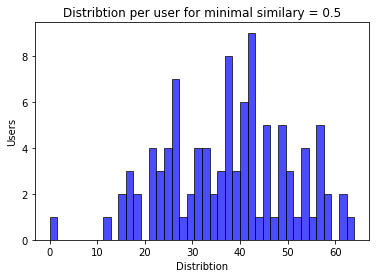

In [62]:
min_similarity=0.05
K = get_K(sim_mat, min_similarity=min_similarity)

### Predict ratings for user-unknown items

In [63]:
def prediction(train_mat, sim_mat, K=1, model='user_based'):
    assert len(train_mat.shape)>1
    n,m = train_mat.shape
    
    if  model=='user_based':
        sim_sort = -1*np.sort(-np.array(sim_mat))[:,1:K+1] # Remove the closest self
        neighbors = np.argsort(-np.array(sim_mat))[:,1:K+1]
        common_items = train_mat[neighbors]>0
        mean_user = np.reshape(np.sum(train_mat,axis=1)/np.sum(train_mat>0,axis=1), (-1,1))
        mat_m = train_mat - mean_user
        aa = np.sum(sim_sort[:,:,np.newaxis]*mat_m[neighbors]*common_items,axis=1)
        bb = np.sum(sim_sort[:,:,np.newaxis]*common_items,axis=1)+1e-10 # Make sure the denominator is not 0
        r_pred = mean_user + aa/bb
        return r_pred
    else: # 'item_based'
        r_pred=[]
        for u in range(n):
            u_mat = np.tile(train_mat[u],(m,1)) # m records d of user u, m*m
            rated_items_sim = (u_mat>0)*sim_mat # Preserve similarity with scored records m*m
            sim_sort = -1*np.sort(-np.array(rated_items_sim))[:,:K] # m*K
            neighbors = np.argsort(-np.array(rated_items_sim))[:,:K] # m*K
            neighbor_ratings = np.array([u_mat[i,neighbors[i]] for i in range(m)])# m*K
            aa = np.sum(sim_sort*neighbor_ratings,axis=1) # m*1
            bb = np.sum(sim_sort,axis=1)+1e-10 # 1e-10 Make sure the denominator is not 0 m*1
            r_pred.append(aa/bb)
        
        return np.array(r_pred)    

In [64]:
r_pred = prediction(train_mat=train_mat, sim_mat=sim_mat, K=K, model='user_based')

### Sort the products according to the predicted value and get the top-n list

In [65]:
n = 50
topn = get_topn(r_pred=r_pred, train_mat=train_mat, n=n)
print('user 0:')
print('top-n list:',topn[0])

user 0:
top-n list: [143  46  43   0 411 410 149 153 150 130 329 284 383 131 132 114 116   2
 341 254 314  29 122   9  96  92  22 351  31 340 343 339  24 310 283 342
 466 464 462 461 465 418 463 457 467 468 479 469 470 471]


### Evaluation Model
$$
 MAE = \frac{1}{\left | R_{test} \right |} \sum_{\left ( u,i \right ) \in R_{test} }^{ } \left | r_{u,i}-\widehat{r}_{u,i} \right |
$$
$$
RMSE = \sqrt{\frac{1}{\left | R_{test} \right |} \sum_{\left ( u,i \right ) \in R_{test} }^{ } \left (r_{u,i}-\widehat{r}_{u,i} \right )^2 }
$$
$$
Recall = \frac{hits}{\left |R_{test} \right |}
$$
$$
Precision = \frac{hits}{\left |top\_n \right |}
$$

In [66]:
mae, rmse = mae_rmse(r_pred=r_pred, test_mat=test_mat)
print('mae:%.4f; rmse:%.4f'%(mae,rmse))
recall, precision = recall_precision(topn=topn, test_mat=test_mat)
print('recall:%.4f; precision:%.4f'%(recall,precision))

mae:0.7752; rmse:1.8184
recall:0.3471; precision:0.4228
